In [12]:
from sklearn.cluster import KMeans
from skimage import io
import numpy as np

%matplotlib inline

image = io.imread('josefov.jpg')

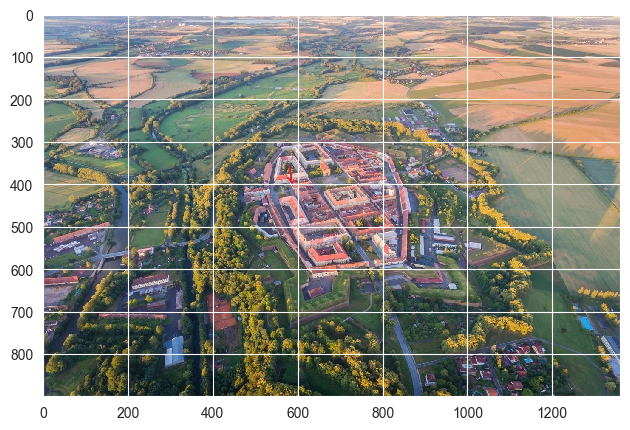

In [13]:
io.imshow(image)

In [14]:
image.shape

(900, 1360, 3)

In [15]:
#preprocessing
rows, cols = image.shape[0], image.shape[1]
image = image.reshape(rows * cols, 3)

In [16]:
print(image.shape)
print(image[:10])

(1224000, 3)
[[171 185 211]
 [171 185 211]
 [171 185 211]
 [170 184 210]
 [169 183 209]
 [167 181 207]
 [165 179 205]
 [164 178 204]
 [167 181 207]
 [167 181 207]]


In [17]:
# modelling
kMeans = KMeans(n_clusters = 16)
kMeans.fit(image)

KMeans(n_clusters=16)

In [18]:
centers = np.asarray(kMeans.cluster_centers_, dtype= np.uint8)
centers

array([[ 67,  81,  78],
       [172, 156, 144],
       [220, 200, 198],
       [ 99, 101,  87],
       [184, 154,  89],
       [ 48,  62,  59],
       [141, 120,  65],
       [222, 177, 152],
       [ 27,  41,  37],
       [114, 124, 118],
       [ 90,  84,  39],
       [175, 170, 181],
       [ 82,  97, 117],
       [146, 140, 123],
       [217, 161, 122],
       [127, 138, 157]], dtype=uint8)

In [19]:
# labels
labels = np.asarray(kMeans.labels_, dtype= np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(1224000,)
(900, 1360)


array([[11, 11, 11, ...,  2,  2,  2],
       [11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ...,  2,  2,  2],
       ...,
       [ 5,  5,  5, ...,  5,  5,  5],
       [ 5,  5,  5, ...,  5,  5,  5],
       [ 5,  5,  5, ...,  5,  5,  5]], dtype=uint8)

In [22]:
# reconstructing
newImage = np.zeros((rows, cols, 3), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        # assigning every pixel the rgb color of their label's ccenters
        newImage[i, j, :] = centers[labels[i, j], :]
io.imsave('josefov_compressed.jpg', newImage)

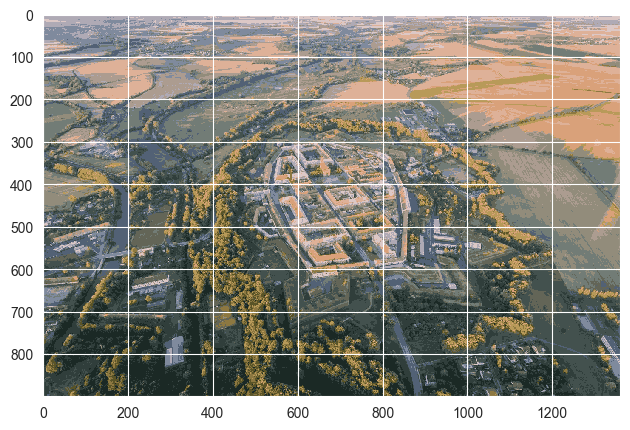

In [23]:
io.imshow(newImage)